<a href="https://colab.research.google.com/github/rishabhdeepsingh/tensorflow/blob/main/03MachineLearningAndNeurons/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow


     |████████████████████████████████| 462 kB 4.1 MB/s 


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-05-29 16:11:20--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-05-29 16:11:20 (35.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

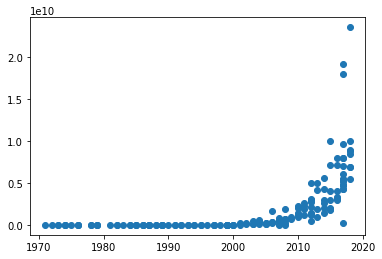

In [ ]:
plt.scatter(X, Y)

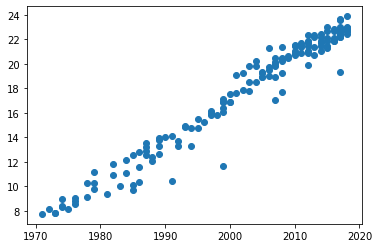

In [ ]:
Y = np.log(Y)
plt.scatter(X, Y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1),
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler],verbose=0)

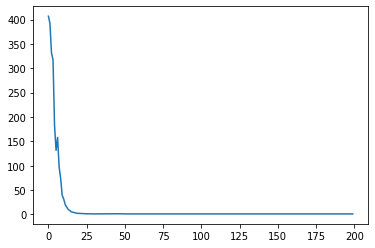

In [ ]:
plt.plot(r.history['loss'], label='loss')

In [ ]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) 
print(model.layers[0].get_weights())

[array([[0.35675177]], dtype=float32), array([17.762848], dtype=float32)]


In [ ]:
a = model.layers[0].get_weights()[0][0,0]
# y = ax + b

In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 1.9429397112317905


In [ ]:
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


## Part-2 Making Predictions

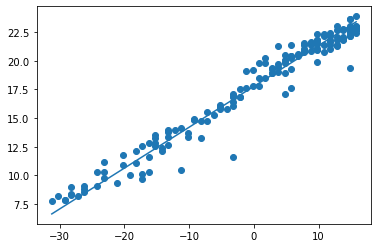

In [ ]:
# Make sure the line fits our data
y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, y_hat)

In [ ]:
# Manual calculations
# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) = (N x 1)
y_hat_2 = (X.dot(w) + b).flatten()

# Dont use == for floating point :D
np.allclose(y_hat, y_hat_2)

True